In [20]:
from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from rich import print as rprint
from safetensors.torch import load_model
from torch import nn

from analysis.common import alignment, plotsvals, sab, trajectories
from koopmann import aesthetics
from koopmann.data import (
    DatasetConfig,
    create_data_loader,
    get_dataset_class,
)
from koopmann.models import MLP, ResMLP
from koopmann.models.utils import parse_safetensors_metadata
from koopmann.utils import (
    compute_model_accuracy,
)
from koopmann.visualization import plot_decision_boundary

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
residual = True
model_name = "mnist_probed"

In [22]:
if residual:
    file_path = f"/scratch/nsa325/koopmann_model_saves/{model_name}_residual.safetensors"
    # Parse metadata
    metadata = parse_safetensors_metadata(file_path=file_path)

    # Load base model
    model = ResMLP(
        input_dimension=literal_eval(metadata["input_dimension"]),
        output_dimension=literal_eval(metadata["output_dimension"]),
        config=[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512],
        nonlinearity=metadata["nonlinearity"],
        bias=literal_eval(metadata["bias"]),
        batchnorm=literal_eval(metadata["batchnorm"]),
    )
    insert_index = len(model.modules) - 2
    model.remove_layer(index=insert_index)
    model.insert_layer(index=insert_index, out_features=512, nonlinearity="relu")
    model.insert_layer(index=insert_index + 1, nonlinearity="relu")

    # Load weights
    load_model(model, file_path, device="cpu")
else:
    file_path = f"/scratch/nsa325/koopmann_model_saves/{model_name}.safetensors"
    model, _ = MLP.load_model(file_path)
model.eval()
model.hook_model()
model.summary()


Layer (type (var_name))                            Param #
ResMLP (ResMLP)                                    --
+ Sequential (_features)                           --
|    + LinearLayer (0)                             --
|    |    + Sequential (layers)                    402,432
|    + ResidualBlock (1)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (2)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (3)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (4)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (5)        

In [23]:
metadata = parse_safetensors_metadata(file_path=file_path)
dataset_config = DatasetConfig(
    dataset_name=metadata["dataset"],
    num_samples=5_000,
    split="test",
    seed=21,
)
DatasetClass = get_dataset_class(name=dataset_config.dataset_name)
dataset = DatasetClass(config=dataset_config)
dataloader = create_data_loader(dataset, batch_size=1024)

In [24]:
rprint(f"Testing Accuracy: {compute_model_accuracy(model, dataset)}")

Testing Accuracy: 0.9887999892234802

BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=784, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bia

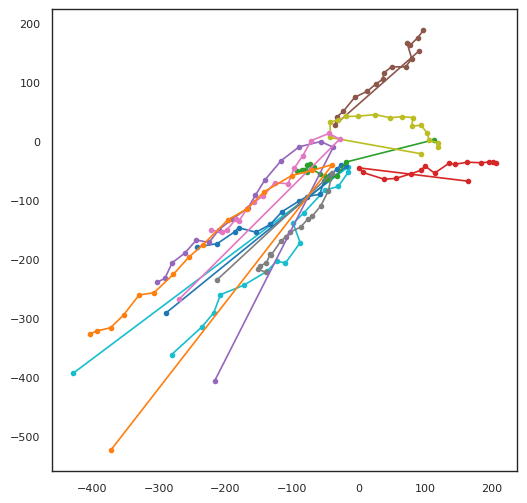

torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
svding layer 0
tensor([ 4.7684e-06, -6.6757e-06,  5.7220e-06, -9.5367e-07,  3.3379e-06,
        -4.7684e-07, -2.8610e-06,  5.7220e-06,  9.5367e-07,  1.9073e-06,
        -4.7684e-07,  4.7684e-07,  2.8610e-06,  1.4305e-06,  1.1921e-06,
        -7.1526e-07, -2.3842e-07, -9.5367e-07,  1.3113e-06, -9.5367e-07,
         4.7684e-07, -1.1921e-07,  6.5565e-07, -6.5565e-07, -1.1921e-07,
        -3.5763e-07, -1.7881e-07, -2.9802e-07,  1.4901e-07, -1.1921e-07,
         2.9802e-07,  5.9605e-08,  3.8743e-07, -2.9802e-08,  5.9605e-08])
tensor([13.3044,  9.0638,  8.1203,  7.8746,  7.4059,  6.9060,  6.1682,  5.5732,
         5.1349,  4.4241,  3.8237,  3.2921,  2.8617,  2.6

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


In [ ]:
if residual:
    sab(model)
    trajectories(model, dataloader, 10, 1)
    images, labels = next(iter(dataloader))
    x = images[0]
    _ = model(x)
    acts, patts = model.get_fwd_acts_patts()
    acts = list(acts.values())[:-1]
    patts = list(patts.values())[:-1]
    JUSV = plotsvals(acts, patts, title="Test")
    alignment(acts, patts, title="Test", JUSV=JUSV)